# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

<br>

In [1]:
!pip install networkx==2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.4 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556008 sha256=f7735cd82195b37d7206512adda7483cec03d74ceef0b29996c8ea3074ea28d5
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3


In [2]:
pip install stellargraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 435 kB 5.2 MB/s 


In [3]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [5]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [6]:
edges = [tuple(x) for x in data.values.tolist()]

In [7]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [8]:
A = list(nx.connected_component_subgraphs(B))[0]

In [9]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


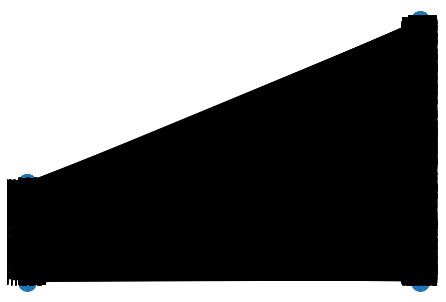

In [10]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [11]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [12]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [13]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [14]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [15]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

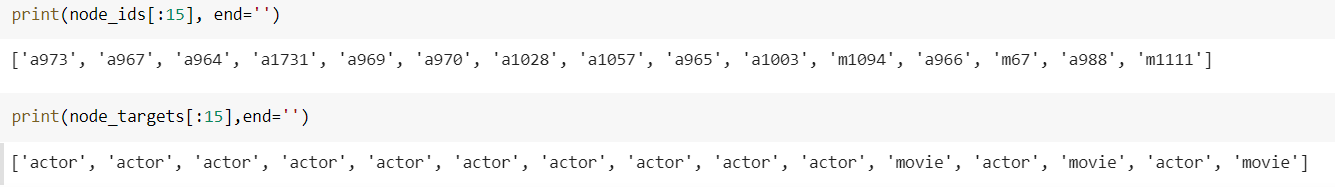

In [16]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie node
    for id in node_ids:
      if id[0]=="a":
        actor_nodes.append(id)
      else:
        movie_nodes.append(id)
    for i in range(len(node_targets)):
      if node_targets[i]=="actor":
        actor_embeddings.append(node_embeddings[i])
      else:
        movie_embeddings.append(node_embeddings[i])

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [17]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings=data_split(node_ids,node_targets,node_embeddings)

<font color='cyan'>Grader function - 1</font>

In [18]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Grader function - 2</font>

In [19]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [74]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    cost1= (len(max(nx.connected_components(graph), key=len)))/(graph.number_of_nodes()*number_of_clusters)
    return cost1

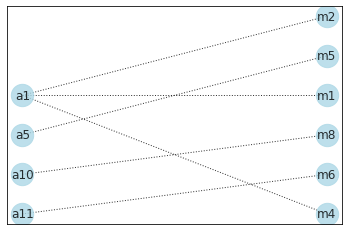

In [21]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Grader function - 3</font>

In [75]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [45]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost2'''
    actor_degree=0
    movie_node=0
    for component in graph.degree:
      if "a" in component[0]:
        actor_degree+=component[1]
      else:
        movie_node+=1
    cost2= (1/number_of_clusters)*(actor_degree/movie_node)  
    return cost2

<font color='cyan'>Grader function - 4</font>

In [46]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]: algo = clustering_algorith(clusters=number_of_clusters)

    # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
    algo.fit(the dense vectors of actor nodes) 
    You can get the labels for corresponding actor nodes (algo.labels_)
    Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
    (You can use ego_graph to create subgraph from the actual graph)
    compute cost1,cost2 
       (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
        cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
    computer the metric Cost = Cost1*Cost2
return number_of_clusters which have maximum Cost

<font color='blue'>Grouping similar actors</font>

In [25]:
from sklearn.cluster import KMeans

In [54]:
for number_of_clusters in [3,5,10,30,50,100,200,400]:
  c1=0
  c2=0
  labels=[]
  cost_values={}
  kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(actor_embeddings)
  labels=kmeans.labels_
  for j in range(1,number_of_clusters+1):
         new_graph=nx.Graph()  # drawing graph for each cluster
         cluster_indexes=[index for index,value in enumerate(labels) if value==i]
         cluster_label=[actor_nodes[l] for l in cluster_indexes]
         for node in cluster_label:
             ego_g=nx.ego_graph(B,node)
             sub_graph1=nx.ego_graph(B,node)
             new_graph.add_nodes_from(sub_graph1.nodes) # adding nodes 
             new_graph.add_edges_from(sub_graph1.edges()) # adding edges 
         # calculating cost functions
         c1+=cost1(new_graph,j)
         c2+=cost2(new_graph,j) 
  value=c1*c2 
  cost_values[j]=value 

In [56]:
optimal_clusters=max(cost_values, key=cost_values.get)

<font color='blue'>Displaying similar actor clusters</font>

In [57]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(actor_embeddings)
labels=kmeans.labels_

In [60]:
from sklearn.manifold import TSNE
transform = TSNE #PCA

trans = transform(n_components=2)
actor_embeddings_2d = trans.fit_transform(actor_embeddings)

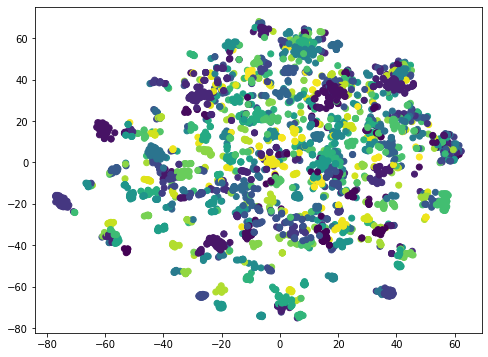

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(actor_embeddings_2d[:,0], actor_embeddings_2d[:,1], c=labels.astype(float))

<font color='blue'>Grouping similar movies</font>

In [62]:
for number_of_clusters in [3,5,10,30,50,100,200,400]:
  c1=0
  c2=0
  labels=[]
  cost_values={}
  kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(movie_embeddings)
  labels=kmeans.labels_
  for j in range(1,number_of_clusters+1):
         new_graph=nx.Graph()  # drawing graph for each cluster
         cluster_indexes=[index for index,value in enumerate(labels) if value==i]
         cluster_label=[actor_nodes[l] for l in cluster_indexes]
         for node in cluster_label:
             ego_g=nx.ego_graph(B,node)
             sub_graph1=nx.ego_graph(B,node)
             new_graph.add_nodes_from(sub_graph1.nodes) # adding nodes 
             new_graph.add_edges_from(sub_graph1.edges()) # adding edges 
         # calculating cost functions
         c1+=cost1(new_graph,j)
         c2+=cost2(new_graph,j) 
  value=c1*c2 
  cost_values[j]=value 

In [63]:
optimal_clusters=max(cost_values, key=cost_values.get)

In [68]:
print("Optimal Clusters is:",optimal_clusters)

Optimal Clusters is: 400


<font color='blue'>Displaying similar movie clusters</font>

In [64]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0).fit(movie_embeddings)
labels=kmeans.labels_

In [66]:
trans = transform(n_components=2)
movie_embeddings_2d = trans.fit_transform(movie_embeddings)

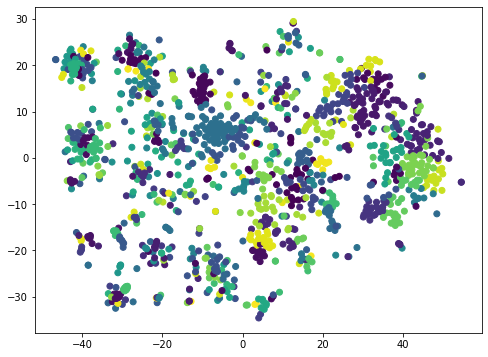

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(movie_embeddings_2d[:,0], movie_embeddings_2d[:,1], c=labels.astype(float))

References: 1. Stack overflow
            2. Reference notebooks.